MAGISK Evaluation
==================

In [53]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
# Read in all slices

# 849 Input --> 696 Trace --> 688 Slice (4: start point is not condition? 4: timeout?)
slice_dir = "./final_out_analysis/slices"
prefix = "/home/amy/repos/magisk/libs/libressl/"

def read_slice_files(in_dir):
    all_files = os.listdir(in_dir)
    res = []
    for cur in all_files:
        if not cur.endswith(".slice"):
            continue
        with open(os.path.join(in_dir, cur), "r") as f:
            lines = f.read().splitlines() 
        res.append({
            "input": os.path.basename(cur).split('.')[0],
            "start": lines[0][len(prefix):],
            "slice": lines[1:],
            "size": len(lines)-1
        })
    return res
    
slice_files = read_slice_files(slice_dir)
print "Read in %d slice files" % len(slice_files)

Read in 687 slice files


In [76]:
# Group by start bbl (=slicing criterion)
df_slices = pd.DataFrame.from_dict(slice_files)

freq_by_start = pd.crosstab(index=df_slices["start"], columns="Count")
print freq_by_start

col_0                                          Count
start                                               
crypto/asn1/a_object.c:298 (discriminator 4)       3
crypto/asn1/a_time_tm.c:160                      116
crypto/asn1/a_time_tm.c:188                       11
crypto/asn1/a_time_tm.c:188 (discriminator 1)     70
crypto/asn1/a_time_tm.c:191                        5
crypto/asn1/a_time_tm.c:191 (discriminator 1)     41
crypto/asn1/a_time_tm.c:194 (discriminator 1)     33
crypto/asn1/a_time_tm.c:197 (discriminator 1)     14
crypto/asn1/a_time_tm.c:201 (discriminator 1)     22
crypto/asn1/a_time_tm.c:34                         3
crypto/asn1/a_utf8.c:158                           7
crypto/asn1/a_verify.c:89 (discriminator 1)        6
crypto/asn1/asn1_lib.c:110                         4
crypto/asn1/asn1_lib.c:142                        27
crypto/asn1/asn1_lib.c:172                        22
crypto/asn1/asn1_lib.c:180                        11
crypto/asn1/asn1_lib.c:452                    

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f48da74ea10>]], dtype=object)

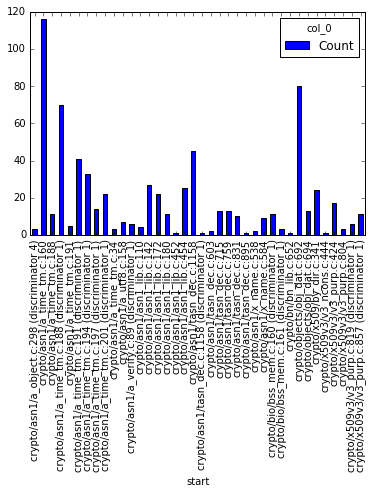

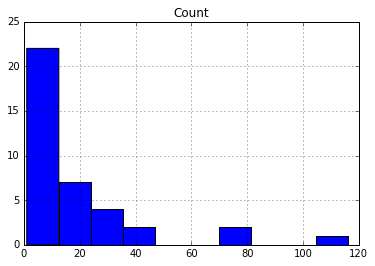

In [77]:
# Group by start bbl (=slicing criterion)
freq_by_start.plot(kind='bar')
freq_by_start.hist()

In [98]:
# Group by slice size (= number of lines)

freq_by_slice_size = pd.crosstab(index=df_slices["size"], columns="count")
print freq_by_slice_size


col_0  count
size        
1         55
2         94
6         68
7         46
8        101
9         11
12         2
13        33
14         3
21        20
25         2
28         2
29         6
31        11
32         2
33         1
34         2
35         1
36         3
37         2
38         2
40         1
41        15
42         4
43        12
44         4
45         2
47         1
48         8
53         1
54        14
55         2
59         2
62         1
66        69
67         8
70        31
76         2
78         1
79         1
80         8
82         4
84         4
85         4
88         5
91         1
92         3
94         4
98         2
99         3
124        2
140        1


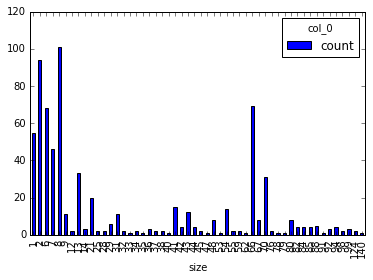

In [99]:
# Group by slice size (= number of lines)
freq_by_slice_size.plot(kind='bar')

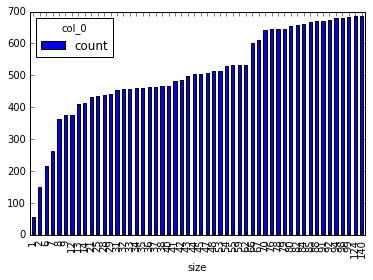

In [113]:
freq_by_slice_size.cumsum().plot(kind='bar')